## Blockchain Technology and Fintech - Assignment 2

Maria Chiara Lischi, ID: 792781

-------

### 1) Introduction

The aim of this analysis is to determine the classification of cryptocurrencies with respect to the traditional asset classes of currencies, commodities, and equities. To achieve this, we examine data from Bloomberg containing weekly returns from 2023 to 2024 for the following asset classes:
- Cryptocurrencies: Bitcoin (XBTUSD Curncy), Ethereum (ETHEREUM Index), Ripple (XRP Curncy), and Cardano (XAD Curncy).
- Traditional currencies: Euro (EURUSD Curncy), and an index of major currencies (FXCTG10 Index)
- Commodities: Gold (XAU Curncy), and Natural Gas (NG1 Comdty)
- Equities: NVIDIA (NVDA US Equity), and the S&P 500 Index (SPX Index)

The dataset consists of 100 observations circa. While the sample size is adequate for a preliminary analysis, its size might limit the reliability of advanced statistical inference.

We begin the analysis by importing the necessary libraries (code section 1), loading (code section 2), and cleaning (code section 3) the data. We then calculate the log returns for each asset (code section 4), which are used as the basis for our analysis. We proceed through a comparison of the log returns of these assets, focusing on the moments of their distributions (code section 5). Further, we evaluate performance metrics such as the Sharpe ratio (code section 6) to assess risk-adjusted returns, and we conduct correlation analysis (code section 7) to examine relationships between cryptocurrencies and other asset classes. We also conduct a Kolmogorov-Smirnov statistical test (code section 8) to test for distributional similarities between cryptocurrencies and other asset classes, and we use regression analysis (code section 9) to identify any potential relationships by analysing the statistical significance of the slopes, the magnitude of the coefficient of determination ($R^2$), and the p-value of the F-statistics. Finally we plot scatter plots (code section 10) to provide a visual representation of these relationships.

-------

### 2) Data preparation

We begin the analysis by importing the necessary libraries to facilitate data manipulation, visualization, and statistical computation.

[Code section 1]

In [1]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import statsmodels.api as sm


Next, we proceed by importing the dataset, which includes historical price data for cryptocurrencies, currencies, commodities, and equities. The data is recorded at a weekly frequency, spanning the period from 2023 to 2024.

[Code section 2]

In [2]:
# LOADING THE DATA

data = pd.read_excel('data.xlsx')
data.head()

,Start Date,2022-12-30 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,End Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,XBTUSD Curncy,ETHEREUM Index,XRP Curncy,XAD Curncy,XAU Curncy,NG1 Comdty,EURUSD Curncy,FXCTG10 Index,NVDA US Equity,SPX Index
3,NaN,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price
4,Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST


We then clean the dataset to prepare it for further analysis, as the initial rows contain metadata and non-relevant information that needs to be removed.

[Code section 3]

In [3]:
# DATA CLEANING

data.columns = data.iloc[2]
data.rename(columns={data.columns[0]: 'Date'}, inplace=True)
data = data.iloc[5:]
data.reset_index(drop=True, inplace=True)

data.head()

2,Date,XBTUSD Curncy,ETHEREUM Index,XRP Curncy,XAD Curncy,XAU Curncy,NG1 Comdty,EURUSD Curncy,FXCTG10 Index,NVDA US Equity,SPX Index
0,2023-01-01 00:00:00,16602.63,1266.55,0.3386,0.2492,1824.02,4.475,1.0705,227.894,14.614,3839.5
1,2023-01-08 00:00:00,16956.66,1340.89,0.3407,0.2908,1865.69,3.71,1.0644,230.065,14.859,3895.08
2,2023-01-15 00:00:00,20906.28,1510.1,0.3857,0.3501,1920.23,3.419,1.083,227.105,16.899,3999.09
3,2023-01-22 00:00:00,22591.84,1735.23,0.3999,0.3748,1926.08,3.174,1.0856,229.044,17.839,3972.61
4,2023-01-29 00:00:00,23797.16,1694.94,0.4132,0.3953,1928.04,3.109,1.0868,229.964,20.365,4070.56


-------

### 3) Analysis

#### 3.1) Log returns

With the data now cleaned, we begin the analysis by calculating the logarithmic returns for the various asset classes to capture their price dynamics. Given the diversity of asset classes in our dataset (cryptocurrencies, commodities, currencies, and equities), logarithmic returns are particularly useful for the purpose of our analysis because they are scale-independent, allowing for comparisons between assets with different price levels. The logarithmic returns serve as the random variables of reference for the subsequent analysis.

[Code section 4]

In [4]:
# COMPUTING THE LOG DIFFERENCE OF RETURNS

data_log_diff = pd.DataFrame(columns=data.columns)
data_log_diff['Date'] = data['Date']

for i in range(1, len(data.columns)):
    data_log_diff[data.columns[i]] = np.log(data[data.columns[i]].astype(float)) - np.log(data[data.columns[i]].astype(float).shift(1))

data_log_diff.dropna(inplace=True)
data_log_diff.set_index('Date', inplace=True)

data_log_diff.head()

2,XBTUSD Curncy,ETHEREUM Index,XRP Curncy,XAD Curncy,XAU Curncy,NG1 Comdty,EURUSD Curncy,FXCTG10 Index,NVDA US Equity,SPX Index
Date,,,,,,,,,,
2023-01-08,0.021100,0.057037,0.006183,0.154380,0.022588,-0.187474,-0.005715,0.009481,0.016626,0.014372
2023-01-15,0.209389,0.118842,0.124058,0.185583,0.028814,-0.081684,0.017324,-0.012949,0.128649,0.026353
2023-01-22,0.077539,0.138964,0.036155,0.068174,0.003042,-0.074355,0.002398,0.008502,0.054133,-0.006644
2023-01-29,0.051977,-0.023493,0.032717,0.053252,0.001017,-0.020691,0.001105,0.004009,0.132431,0.024357
2023-02-05,-0.038293,0.034200,-0.037731,-0.019671,-0.033259,-0.254674,-0.006740,-0.003428,0.035455,0.016065


#### 3.2) Moments of the distribution of log returns

Now that we have computed the log returns, our objective is to compare the distributional characteristics of each asset class's return behaviour. To achieve this, we analyze and compare the moments of their distributions, as they provide insights into the central tendency, variability, skewness, and tail behaviour of the data. Specifically, we use the mean and median to capture the central tendency of returns, the standard deviation to measure the variability or risk associated with each asset, and skewness and kurtosis, to provide a deeper understanding of the chances of getting returns higher or lower with respect to the median sample returns and the likelihood of extreme returns, respectively. However, given the sample size of only 100 observations, these results should be interpreted cautiously, as the data may be sensitive to outliers.

[Code section 5]

In [ ]:
# COMPUTING THE MOMENTS OF THE DISTRIBUTION OF RETURNS FOR EACH ASSET

data_returns = []
for col in data.columns[1:]:
    asset = col
    returns = data_log_diff[col]
    mean = returns.mean()
    median = returns.median()
    std = returns.std()
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    data_returns.append({'Asset': asset,
                        'Mean': mean,
                        'Median': median,
                        'Standard Deviation': std,
                        'Skewness': skewness,
                        'Kurtosis': kurtosis})
data_returns = pd.DataFrame(data_returns)
data_returns.set_index('Asset', inplace=True)

data_returns

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Asset,,,,,
XBTUSD Curncy,0.017834,0.002852,0.068418,0.813760,1.454073
ETHEREUM Index,0.010235,0.012231,0.076815,0.246451,-0.372860
XRP Curncy,0.014618,0.000646,0.107196,2.396735,10.173253
XAD Curncy,0.014273,-0.009939,0.119595,1.379447,5.654137
XAU Curncy,0.004022,0.001763,0.019845,0.370301,0.823709
NG1 Comdty,-0.003614,-0.004321,0.100507,-0.217457,0.580429
EURUSD Curncy,-0.000275,-0.000375,0.008186,0.368204,0.387398
FXCTG10 Index,0.001087,0.002356,0.007034,-0.862068,1.358835
NVDA US Equity,0.022965,0.019728,0.064304,0.145994,0.674193


The table above presents the statistical moments for the weekly logarithmic returns of the selected asset classes.

For measures of central tendency, cryptocurrencies exhibit higher mean returns compared to traditional assets, suggesting superior average performance over the sample period. Bitcoin and Ethereum have mean returns of 0.0178 and 0.0102, respectively, which significantly exceed those of gold (0.0040) and the S&P 500 (0.0045).

Within the equities asset class, NVIDIA demonstrates high mean and median returns comparable to cryptocurrencies. However, we do not consider NVIDIA to be a good representative of the equity asset class, as in recent years, it has outperformed the equity market. Furthermore, it is influenced by its strong association with cryptocurrency mining. We believe the S&P 500 index, being a broad market benchmark, to be more representative of the equities asset class.

In terms of variability, cryptocurrencies exhibit much higher standard deviations compared to traditional assets, demonstrating their notorious volatility. For instance, Bitcoin and Ethereum have standard deviations of 0.0684 and 0.0768, respectively, significantly higher than that of the S&P 500 (0.0180) or gold (0.0198). Traditional currencies and gold display low standard deviations, highlighting their role as stable, low-risk instruments. Equities, while inherently riskier than currencies, show less variability than cryptocurrencies, highlighting their lower risk (again, we are not considering NVIDIA, which shows volatility of 0.0643, comparable to that of cryptocurrencies).

Regarding skewness, cryptocurrencies exhibit higher values compared to traditional assets, indicating more asymmetrical return distributions. For example, Ripple (2.3967) and Cardano (1.3794) stand out with particularly high positive skewness. This characteristic is not observed to the same extent in traditional currencies, commodities, or equities, which generally exhibit milder skewness values close to zero.

Finally, kurtosis values for cryptocurrencies are substantially larger than those of traditional assets, indicating heavier tails in their return distributions. Again, Ripple (10.1733) and Cardano (5.6541) exemplify this behaviour, suggesting a greater likelihood of extreme return events, both positive and negative. This fatter-tailed distribution distinguishes cryptocurrencies from traditional asset classes, which exhibit lower kurtosis values and thus a lower propensity for extreme outcomes.

In summary, cryptocurrencies are characterized by higher mean returns, greater volatility, pronounced skewness, and heavier tails relative to traditional asset classes. These findings highlight the distinct behaviour of cryptocurrencies, positioning them as a unique asset class that differs significantly from traditional currencies, commodities, and equities.

#### 3.3) Sharpe ratio

The next step in our analysis involves computing the Sharpe ratio for each asset. The Sharpe ratio evaluates the risk-adjusted performance of an asset. It is calculated as the excess return of an asset over a risk-free rate (which we will assume to be zero), divided by its standard deviation, providing insight into how much return an asset delivers per unit of risk.

[Code section 6]

In [6]:
# COMPUTING THE SHARPE RATIO (ASSUMING RISK-FREE RATE = 0)

data_sharpe = []
for col in data.columns[1:]:
    asset = col
    returns = data_log_diff[col]
    mean = returns.mean()
    std = returns.std()
    sharpe = mean/std
    data_sharpe.append({'Asset': asset, 'Sharpe Ratio': sharpe})
data_sharpe = pd.DataFrame(data_sharpe)
data_sharpe.set_index('Asset', inplace=True)

data_sharpe

,Sharpe Ratio
Asset,
XBTUSD Curncy,0.260664
ETHEREUM Index,0.133241
XRP Curncy,0.136365
XAD Curncy,0.119344
XAU Curncy,0.202676
NG1 Comdty,-0.035958
EURUSD Curncy,-0.033533
FXCTG10 Index,0.154583
NVDA US Equity,0.357125


As stated, the Sharpe ratio results provide a comparative overview of the risk-adjusted performance of the various asset classes. The highest Sharpe ratio is observed for NVIDIA (0.3571), followed by Bitcoin (0.2607), the S&P 500 (0.2474), and gold (0.2027). Despite Bitcoin's relatively high Sharpe ratio of 0.2607, which positions it as a competitive asset in terms of risk-adjusted returns, the rest of the cryptocurrencies exhibit significantly smaller Sharpe ratios compared to other asset classes. Ethereum (0.1332), Ripple (0.1364), and Cardano (0.1193) all fall below the Sharpe ratios of traditional assets such as the S&P 500 and gold. This lower sharp ratio is mainly related to the significantly higher volatility of cryptocurrencies, which increases the denominator of the Sharpe ratio formula, thus reducing the ratio itself.

#### 3.4) Correlation analysis

We proceed by computing the correlation matrix of the logarithmic returns for the various asset classes, in order to quantify the relationships between the returns of cryptocurrencies and those of traditional asset classes. The correlation matrix provides insights into the degree of linear association between the returns of different assets, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). We will display the matrix as a heat map, to obtain a clearer and more immediate understanding of the strength and direction of these correlations.

[Code section 7]

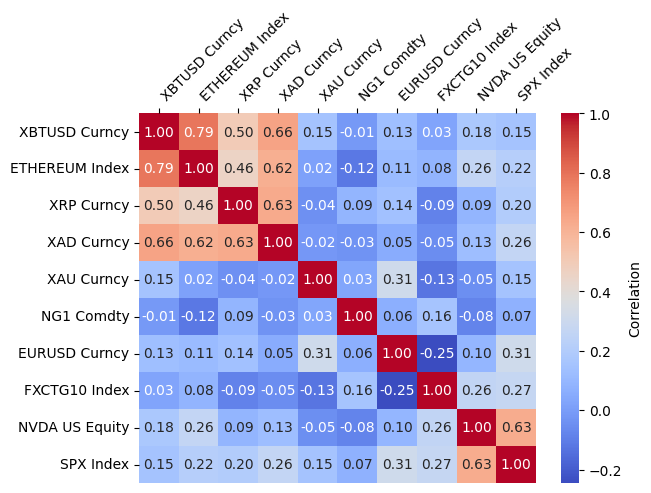

In [ ]:
# COMPUTING THE CORRELATION MATRIX

correlation_matrix = data_log_diff.corr()

# Create the heatmap
ax = sns.heatmap( correlation_matrix,
                annot=True, fmt=".2f",
                cmap="coolwarm",
                cbar_kws={'label': 'Correlation'})
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45, ha = 'left')

plt.show()

Unsurprisingly, the heat map reveals that cryptocurrencies are highly correlated among themselves and exhibit weak correlations with equities, commodities, and currencies. This strong intra-asset correlation among cryptocurrencies highlights the similarity in their market behavior (this also poses a challenge for regression models, as using multiple cryptocurrencies as explanatory variables would lead to multicollinearity). Cryptocurrencies appear to be uncorrelated with gold and traditional currencies. It is also observed that NVIDIA shows low but positive correlations with Ethereum, which can likely be attributed to its involvement in cryptocurrency related technologies, as discussed previously. Overall, the low correlations between cryptocurrencies and traditional asset classes support the thesis that cryptocurrencies constitute a unique and separate asset class.

#### 3.5) Kolmogorov-Smirnov test

We proceed by performing the Kolmogorov-Smirnov statistical test to compare the distribution of Bitcoin's returns with those of other asset classes. For this test, Bitcoin will serve as the reference asset for the crypto class. The Kolmogorov-Smirnov test is a non-parametric test that evaluates whether two samples are drawn from the same distribution. The null hypothesis of the test is that the two samples are drawn from the same distribution.

Given Bitcoin's unique characteristics as a cryptocurrency, we expect to find that its distribution differs from those of traditional asset classes (hence rejecting the null hypothesis of the statistical test), further supporting its classification, along with other cryptocurrencies, as a separate and distinct asset class.

[Code section 8]

In [ ]:
# KORMOGOROV-SMIRNOV TEST

ks_test = []

for i in range(len(data.columns[1:])):
    ks_statistic, p_value = ks_2samp(data_log_diff[data.columns[1]], data_log_diff[data.columns[i+1]])
    ks_test.append({'Asset 1': data.columns[1],
                    'Asset 2': data.columns[i+1],
                    'KS Statistic': ks_statistic,
                    'P-Value': p_value})

ks_test = pd.DataFrame(ks_test)
ks_test

,Asset 1,Asset 2,KS Statistic,P-Value
0,XBTUSD Curncy,XBTUSD Curncy,0.000000,1.000000e+00
1,XBTUSD Curncy,ETHEREUM Index,0.151515,2.064339e-01
2,XBTUSD Curncy,XRP Curncy,0.131313,3.620779e-01
3,XBTUSD Curncy,XAD Curncy,0.171717,1.079831e-01
4,XBTUSD Curncy,XAU Curncy,0.272727,1.199209e-03
5,XBTUSD Curncy,NG1 Comdty,0.202020,3.492894e-02
6,XBTUSD Curncy,EURUSD Curncy,0.393939,3.026184e-07
7,XBTUSD Curncy,FXCTG10 Index,0.424242,2.264460e-08
8,XBTUSD Curncy,NVDA US Equity,0.141414,2.764589e-01
9,XBTUSD Curncy,SPX Index,0.292929,3.771136e-04



The results of the Kolmogorov-Smirnov statistical test reveal important information about the distributional differences between cryptocurrencies (represented by Bitcoin in this analysis) and other asset classes.

Unsurprisingly, when comparing Bitcoin with other cryptocurrencies, we find no sufficient empirical evidence to reject the null hypothesis, as their p-values are relatively high (Ethereum: 0.2064, Ripple: 0.3621, Cardano: 0.1079). This outcome is consistent with the high intra-asset correlation observed in the correlation matrix.

For gold, however, the null hypothesis can be rejected with a significance level of 1% (p-value: 1.20e-03). Similarly, the null hypothesis is rejected for natural gas with a significance level of 5% (p-value: 3.49e-02). These results indicate that there is no strong empirical evidence in favour of the assumption regarding the fact that Bitcoin and the other assets sample returns are drawn from the same distribution, reinforcing the distinction between cryptocurrencies and the commodity asset class.

With respect to traditional currencies, the null hypothesis is rejected with significance level of 1% for both EURUSD (p-value: 3.03e-07) and the FXCTG10 Index (p-value: 2.26e-08). This finding also supports the classification of Bitcoin as a separate asset class from traditional fiat currencies.

The null hypothesis is also rejected for the S&P 500 with significance level of 1% (p-value: 3.77e-04), indicating that Bitcoin's return distribution differs from that of equities. This finding is also consistent with the low correlation observed between Bitcoin and the S&P 500 in the correlation matrix. For NVIDIA (NVDA), however, the same cannot be stated, as we cannot reject the null hypothesis (p-value: 2.76e-01). As mentioned previously, this is likely due to NVIDIA's business being related to that of cryptocurrency, which ties its performance to cryptocurrency markets.

In summary, the Kolmogorov-Smirnov test results largely support the thesis that cryptocurrencies exhibit distinct distributional behavior compared to traditional asset classes such as currencies, commodities, and equities.

#### 3.6) Regression analysis

Finally, we conduct regression analysis to explore potential relationships between cryptocurrencies and traditional asset classes. Specifically, we regress the logarithmic returns of Bitcoin, Ethereum, Ripple, and Cardano on the logarithmic returns of Euro, Gold, Natural Gas, NVIDIA, and the S&P 500, performing single regression analyses for each pair. The goal of this analysis is to determine the extent to which traditional market factors explain the behaviour of cryptocurrencies.

[Code section 9]

In [ ]:
# REGRESSION ANALYSIS WITH STATS MODELS

X = data_log_diff[data.columns[1]]
X = sm.add_constant(X)
cryptos = ['XBTUSD Curncy', 'ETHEREUM Index', 'XRP Curncy', 'XAD Curncy']
regressors = ['XAU Curncy', 'NG1 Comdty', 'EURUSD Curncy', 'FXCTG10 Index', 'NVDA US Equity', 'SPX Index']

models = []
for crypto in cryptos:
    for regressor in regressors:
        Y = data_log_diff[regressor]
        model = sm.OLS(Y, X).fit()
        models.append({'Crypto': crypto,
                    'Regressor': regressor,
                    'R-Squared': model.rsquared,
                    'Beta P-Value': model.pvalues[1],
                    'Beta': model.params[1],
                    'Alpha P-Value': model.pvalues[0],
                    'Alpha': model.params[0],
                    'F-Statistic Probability': model.f_pvalue})
models = pd.DataFrame(models)

models

,Crypto,Regressor,R-Squared,Beta P-Value,Beta,Alpha P-Value,Alpha,F-Statistic Probability
0,XBTUSD Curncy,XAU Curncy,0.022383,0.139401,0.043395,0.116179,0.003248,0.139401
1,XBTUSD Curncy,NG1 Comdty,0.000146,0.905562,-0.017741,0.754038,-0.003298,0.905562
2,XBTUSD Curncy,EURUSD Curncy,0.017375,0.193410,0.015772,0.513479,-0.000556,0.193410
3,XBTUSD Curncy,FXCTG10 Index,0.000705,0.794239,0.002729,0.160417,0.001039,0.794239
4,XBTUSD Curncy,NVDA US Equity,0.031476,0.078952,0.166748,0.003183,0.019991,0.078952
5,XBTUSD Curncy,SPX Index,0.023384,0.130761,0.040265,0.047067,0.003739,0.130761
6,ETHEREUM Index,XAU Curncy,0.022383,0.139401,0.043395,0.116179,0.003248,0.139401
7,ETHEREUM Index,NG1 Comdty,0.000146,0.905562,-0.017741,0.754038,-0.003298,0.905562
8,ETHEREUM Index,EURUSD Curncy,0.017375,0.193410,0.015772,0.513479,-0.000556,0.193410
9,ETHEREUM Index,FXCTG10 Index,0.000705,0.794239,0.002729,0.160417,0.001039,0.794239


The results of the regression analysis reveal important insights into the relationships between cryptocurrencies and traditional asset classes. First, the p-values associated with the F-statistics are very high across all regressions. This indicates that we do not have sufficient evidence to reject the null hypothesis that the regressors and regressands are unrelated. Furthermore, the lack of significant relationships is supported by the low significance of the beta coefficients in all cases, with most p-values for the beta coefficients being well above the 0.05 threshold for statistical significance.

Additionally, the $R^2$ value, which measures the proportion of the variability in the dependent variable (Y) explained by the independent variable (X), is extremely low across all regressions. This suggests that the variability in the returns of traditional asset classes does not explain the variability in the returns of cryptocurrencies. Even in cases where the $R^2$ value is slightly higher, such as the regressions involving NVIDIA or the S&P 500, the values remain too small to indicate meaningful explanatory power.

In summary, the regression analysis suggests that traditional asset classes provide little to no explanatory insight into the return behaviour of cryptocurrencies. This further reinforces the thesis that cryptocurrencies operate largely independently of traditional asset classes, underscoring the fact that they represent a distinct and separate asset class.

#### 3.7) Scatter plots

To complement the regression analysis and provide a visual representation of the relationships between cryptocurrencies and traditional asset classes, we plotted scatter plots of the logarithmic returns for each cryptocurrency (Bitcoin, Ethereum, Ripple, and Cardano) against each traditional asset class (Gold, Natural Gas, Euro, FXCTG10, NVIDIA, and the S&P 500). These scatter plots allow us to visually examine the relationships, or lack thereof, between the variables, providing additional context to the numerical results of the regression analysis.

[Code section 10]

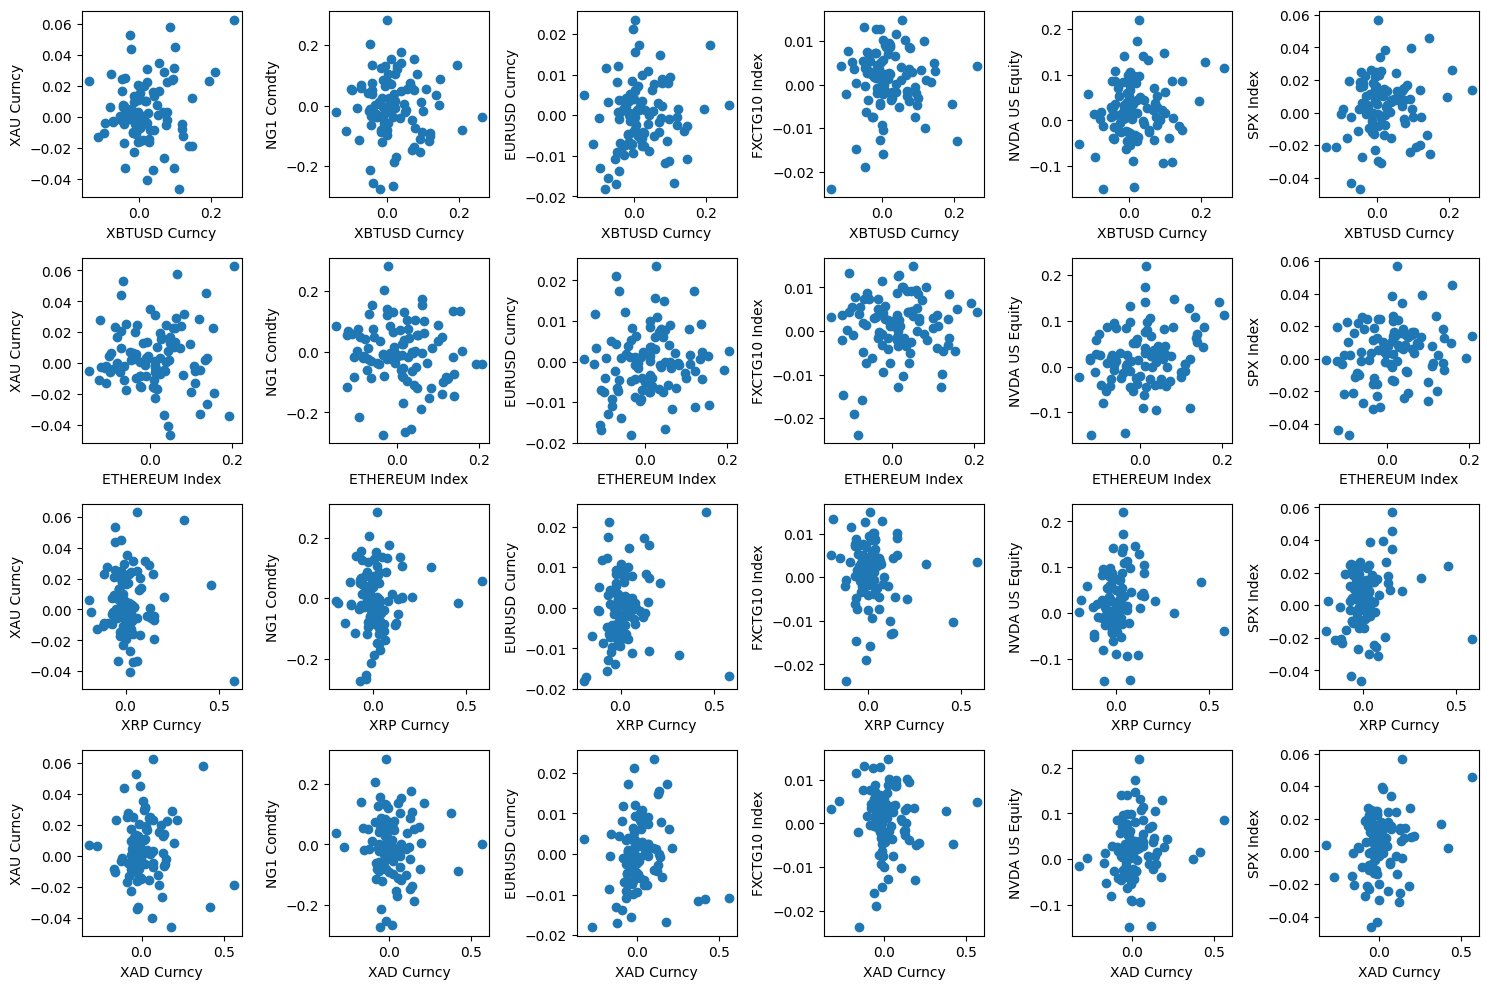

In [10]:
# SUBPOT OF THE RENDIMENTS OF THE Y AS BITCOIN AS X OTHE RASSET CLASSES

fig, axs = plt.subplots(4, 6, figsize=(15, 10))
axs = axs.ravel()
for i, crypto in enumerate(cryptos):
    for j, regressor in enumerate(regressors):
        axs[i*6+j].scatter(data_log_diff[crypto], data_log_diff[regressor])
        axs[i*6+j].set_xlabel(crypto)
        axs[i*6+j].set_ylabel(regressor)
plt.tight_layout()
plt.show()

The scatter plots reveal a lack of discernible patterns between the cryptocurrencies and the traditional asset classes. Most plots display widely dispersed points, with no clear linear relationship. This visual impression aligns with the results of the regression analysis, further supporting the conclusion that there is no significant relationship among the asset classes and that the variability in traditional asset class returns does not significantly explain the variability in cryptocurrency returns.

-------

### 4) Conclusion

In conclusion, this analysis has provided a comprehensive comparison of cryptocurrencies with traditional asset classes, focusing on their statistical moments, risk-adjusted returns, correlations, distributional similarities, and explanatory relationships. Cryptocurrencies, represented by Bitcoin, Ethereum, Ripple, and Cardano, exhibit higher mean returns but significantly greater volatility compared to traditional currencies, commodities, and equities. The Sharpe ratio analysis highlighted Bitcoin as a relatively efficient risk-adjusted performer, though other cryptocurrencies underperformed relative to gold and equities like the S&P 500. Correlation analysis revealed that cryptocurrencies are highly correlated within their class but show weak or negligible correlations with traditional asset classes, reinforcing their independence. The Kolmogorov-Smirnov test further underscored the distinct distributional behaviour of crypto (represented by Bitcoin) compared to traditional assets. Finally, the regression analysis and scatter plots demonstrated that the variability in traditional asset classes does not explain the variability in cryptocurrency returns.

Together, these findings strongly support the thesis that cryptocurrencies constitute a distinct and separate asset class, largely independent from traditional financial markets.